In [91]:
import numpy as np
import pandas as pd
import matplotlib as mps
import matplotlib.pyplot as plt
%matplotlib inline
import requests
#!pip install folium
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print('all imported')

all imported


In [92]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-a40986bd-4e90-445b-8a62-99d6e1445819',
    'IBM_API_KEY_ID': 'tJbDCaQimRjvoU7hDkpXOhmq8mEw1wzIy1b_zehO8Seu',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'courseracapstoneprojects-donotdelete-pr-zrgpucmbdmtuyd',
    'FILE': 'Bangalore.csv'
}
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4ffa40034bad41a097e5771b1d4e99b2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tJbDCaQimRjvoU7hDkpXOhmq8mEw1wzIy1b_zehO8Seu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_4ffa40034bad41a097e5771b1d4e99b2.get_object(Bucket='courseracapstoneprojects-donotdelete-pr-zrgpucmbdmtuyd',Key='Bangalore.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head(10)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099790
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022200
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817440
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063890
5,5,Central,Pete area,12.962700,77.575800,730999,Bangalore,50712.430220
6,6,Central,Rajajinagar,12.990100,77.552500,981362,Bangalore,60967.535870
7,7,Central,Sadashivanagar,13.006800,77.581300,662625,Bangalore,59943.541560
8,8,Central,Seshadripuram,12.993500,77.578700,396862,Bangalore,58407.090340
9,9,Central,Shivajinagar,12.985700,77.605700,77836,Bangalore,55850.962100


In [93]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' Dataframe

In [94]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [95]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.9623396203125 77.601752946875


<h1> Exploring bangalore Neighborhoods using FourSquare API

In [96]:
CLIENT_ID = 'UTNCAQF05Q3GMK45QVFIACYZAC3G1FQWOQZA145TDWKXKNM0'
CLIENT_SECRET = 'A211ZCDYA4UJRDPMOH1F013FR1AKZCTSCXLGM1DPUQMCNMPX'
VERSION = '20180606'
LIMIT = 150

In [97]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [98]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
    
borough_colors

{'Central': '#2F2BE7',
 'Eastern': '#CD95CB',
 'NorthEastern': '#316BAF',
 'Northern': '#4D34E1',
 'SouthEastern': '#81A9FC',
 'Southern': '#8A81AA',
 'SouthernSuburbs': '#24D092',
 'Western': '#11EAD9'}

In [99]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [100]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)
    
bangalore_map

In [101]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [102]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [103]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  619


In [104]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


<h1> Number of venues per neighborhood

In [105]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(60)

Venue Category
Indian Restaurant                120
Fast Food Restaurant              30
Café                              29
Bakery                            24
Ice Cream Shop                    22
Department Store                  18
Pizza Place                       18
Coffee Shop                       17
Chinese Restaurant                14
Park                              12
Hotel                             11
Restaurant                        11
Clothing Store                    10
Gym                               10
Lounge                             9
Pub                                8
ATM                                8
Vegetarian / Vegan Restaurant      8
Bus Station                        6
South Indian Restaurant            6
Snack Place                        6
Breakfast Spot                     6
Kerala Restaurant                  6
Market                             6
Sandwich Place                     6
Italian Restaurant                 5
Convenience Store      

In [106]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()
individual_bangalore_venue_count

Borough
Borough Neighborhood                 
Central Cantonment area             5
        Domlur                     11
        Indiranagar                63
        Jeevanbheemanagar           4
        Malleswaram                 6
...                               ...
Western Nagarbhavi                  8
        Nandini Layout              1
        Nayandahalli                3
        Rajarajeshwari Nagar        7
        Vijayanagar                 4

[62 rows x 1 columns]

In [107]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [108]:
individual_bangalore_venue_count.reset_index(inplace=True)
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,63
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
...,...,...,...
57,Western,Nagarbhavi,8
58,Western,Nandini Layout,1
59,Western,Nayandahalli,3
60,Western,Rajarajeshwari Nagar,7


In [109]:
sns.set(rc={'figure.figsize':(11,16)})

In [110]:
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

[Text(0, 0, 'Cantonment area'),
 Text(1, 0, 'Domlur'),
 Text(2, 0, 'Indiranagar'),
 Text(3, 0, 'Jeevanbheemanagar'),
 Text(4, 0, 'Malleswaram'),
 Text(5, 0, 'Pete area'),
 Text(6, 0, 'Rajajinagar'),
 Text(7, 0, 'Sadashivanagar'),
 Text(8, 0, 'Seshadripuram'),
 Text(9, 0, 'Shivajinagar'),
 Text(10, 0, 'Ulsoor'),
 Text(11, 0, 'Vasanth Nagar'),
 Text(12, 0, 'Bellandur'),
 Text(13, 0, 'CV Raman Nagar'),
 Text(14, 0, 'Hoodi'),
 Text(15, 0, 'Krishnarajapuram'),
 Text(16, 0, 'Mahadevapura'),
 Text(17, 0, 'Marathahalli'),
 Text(18, 0, 'Varthur'),
 Text(19, 0, 'Whitefield'),
 Text(20, 0, 'Banaswadi'),
 Text(21, 0, 'HBR Layout'),
 Text(22, 0, 'Horamavu'),
 Text(23, 0, 'Kammanahalli'),
 Text(24, 0, 'Lingarajapuram'),
 Text(25, 0, 'Ramamurthy Nagar'),
 Text(26, 0, 'Hebbal'),
 Text(27, 0, 'Jalahalli'),
 Text(28, 0, 'Mathikere'),
 Text(29, 0, 'R. T. Nagar'),
 Text(30, 0, 'Vidyaranyapura'),
 Text(31, 0, 'Yelahanka'),
 Text(32, 0, 'Yeshwanthpur'),
 Text(33, 0, 'BTM Layout'),
 Text(34, 0, 'Bommanahalli

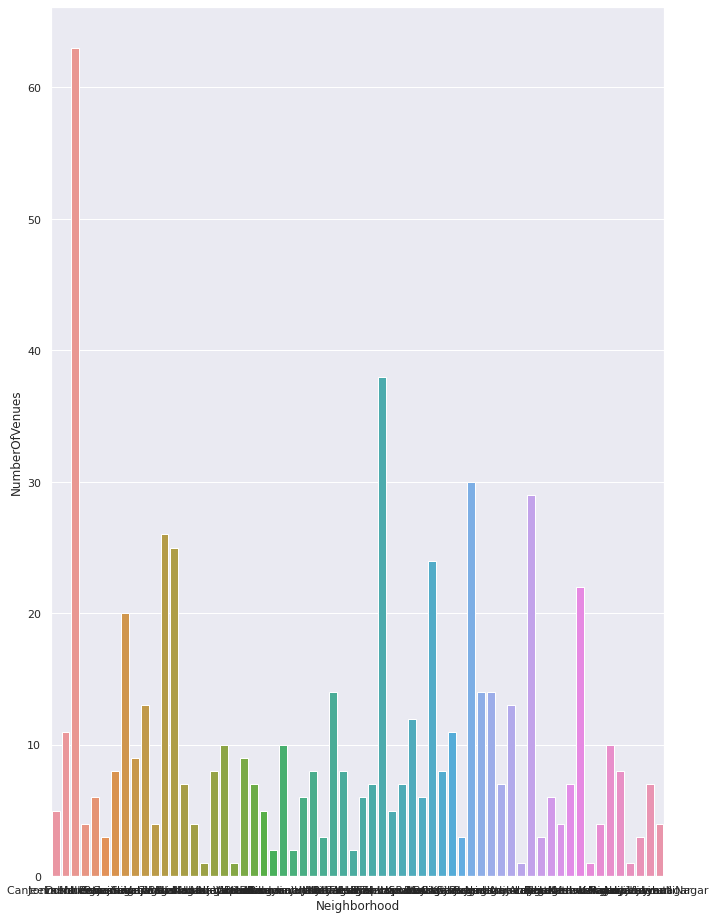

In [111]:
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)

In [112]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [113]:
bangalore_population_bar = pd.DataFrame(df[['Neighborhoods','Population']])
bangalore_population_bar.head()
bangalore_population_bar.sort_values(by='Population', ascending=False)

,Neighborhoods,Population
46,Kumaraswamy Layout,983614
6,Rajajinagar,981362
56,Kamakshipalya,968497
53,Hulimavu,949207
11,Vasanth Nagar,942711
...,...,...
19,Whitefield,83029
9,Shivajinagar,77836
54,Kothnur,65249
32,Yelahanka,15846


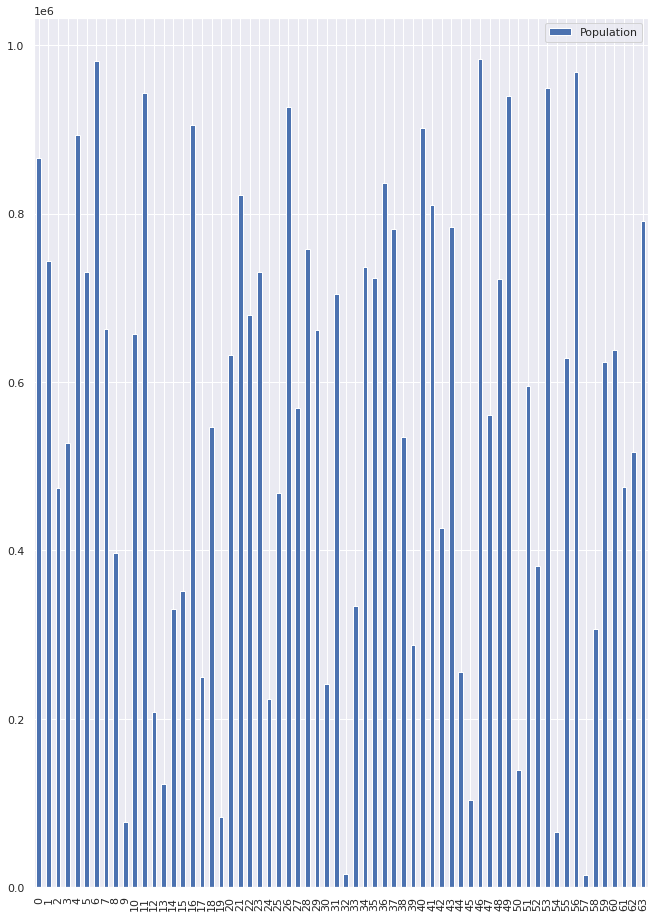

In [114]:
bangalore_population_bar.plot(kind='bar')

<h1> IT IS EVIDENT FROM THE BAR GRAPH THAT INDIRANAGR HAS MUCH MORE VENUES THAN ANY OTHER PLACE IN BANGALORE! IT IS ALSO AMONG THE TOP AT POPULATED PLACES AND HENCE WE CAN ASSUME THAT THIS PLACE HAS A BETTER CHANCES OF A CHINESE RESTAURANT BUSINESS BOOMING

In [115]:
indiranagar_table=bangalore_venues[bangalore_venues['Neighborhood']=='Indiranagar']

In [116]:
indiranagar_table.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False)

Venue Category
Lounge                   5
Pub                      5
Café                     4
Indian Restaurant        4
Clothing Store           3
Cocktail Bar             3
Ice Cream Shop           3
Restaurant               3
Gym                      2
Bakery                   2
Cupcake Shop             2
Italian Restaurant       2
Asian Restaurant         2
Steakhouse               2
Mexican Restaurant       1
Music Venue              1
Udupi Restaurant         1
Bar                      1
Boutique                 1
Brewery                  1
Bus Station              1
Tex-Mex Restaurant       1
Chocolate Shop           1
Tea Room                 1
Coffee Shop              1
Sports Bar               1
Deli / Bodega            1
Dessert Shop             1
Diner                    1
Frozen Yogurt Shop       1
Grocery Store            1
Vietnamese Restaurant    1
Hotel                    1
Spa                      1
Women's Store            1
Name: Neighborhood, dtype: int64

<h1> One hot encoding for letting us to compare different venues based on some common scale

In [117]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
number_of_top_venues = 5

In [119]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,Arekere,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.034483,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,BTM Layout,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.052632,0.0,0.000000,0.0,0.0
3,Banashankari,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,Banaswadi,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Vidyaranyapura,0.500000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
58,Vijayanagar,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
59,Whitefield,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
60,Yelahanka,0.166667,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [120]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                               Venue  Frequency
0                 Venue Category_ATM        1.0
1           Venue Category_Nightclub        0.0
2     Venue Category_Motorcycle Shop        0.0
3       Venue Category_Movie Theater        0.0
4  Venue Category_Mughlai Restaurant        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.28
1  Venue Category_Sporting Goods Shop       0.14
2          Venue Category_Pizza Place       0.07
3          Venue Category_Supermarket       0.03
4                  Venue Category_Pub       0.03


--------- BTM Layout ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.21
1           Venue Category_Snack Place       0.08
2        Venue Category_Ice Cream Shop       0.08
3    Venue Category_Chinese Restaurant       0.08
4  Venue Category_Fast Food Restaurant       0.05


--------- Banashankari

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [121]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [122]:

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Fast Food Restaurant,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Miscellaneous Shop
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store


In [123]:
neighborhoods_venues_sorted.shape

(62, 6)

<h1> FINDING THE K VALUE

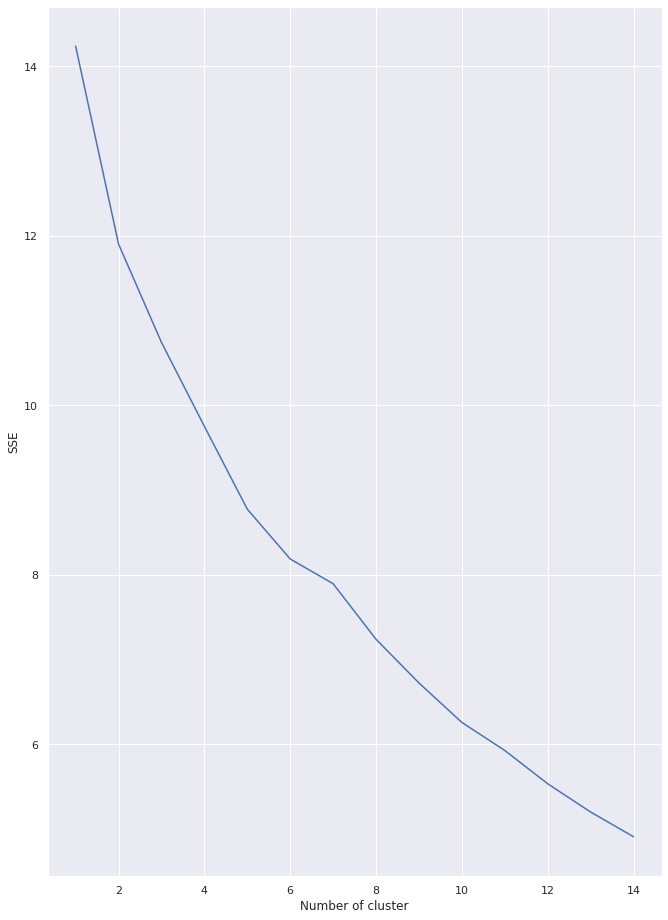

In [124]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above graph, we can see the optimal value for cluster is 5.

In [125]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [126]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(n_clusters=5, random_state=0)

In [127]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [128]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    24
1     6
2     4
3     6
4    22
Name: Neighborhood, dtype: int64

In [130]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_African Restaurant',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       ...
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Travel & Transport', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Venue Category_Yoga Studio',
       'Cluster'],
      dtype='object', length=140)

In [131]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [132]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Fast Food Restaurant,Venue Category_French Restaurant,Venue Category_Food Truck,Venue Category_Food Court,1.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Ice Cream Shop,Venue Category_Bar,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Chinese Restaurant,Venue Category_Pizza Place,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,4
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Miscellaneous Shop,0.0,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,4


In [133]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [134]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [135]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [136]:
map_clusters

<h1> Finding the number of chinese places using ML techniques

In [137]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [138]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


In [139]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [140]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099790,0.293051
1,Central,Domlur,56837.022200,0.879225
2,Central,Indiranagar,41991.817440,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063890,0.824047


In [141]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [142]:
bangalore_Chinese = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_Chinese.head()

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [144]:
bangalore_Chinese['Venue Category_Chinese Restaurant']

0     0
1     1
2     3
3     0
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Name: Venue Category_Chinese Restaurant, Length: 62, dtype: uint8

In [146]:
bangalore_Chinese = bangalore_Chinese[['Neighborhood','Venue Category_Chinese Restaurant']]

In [147]:
bangalore_Chinese.rename(columns={'Venue Category_Chinese Restaurant':'NumberOfChineseRestaurants'},inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [152]:
bangalore_Chinese.head()

,Neighborhood,NumberOfChineseRestaurants
0,Anjanapura,0
1,Arekere,1
2,BTM Layout,3
3,Banashankari,0
4,Banaswadi,0


In [153]:
bangalore_Chinese['NumberOfNonChineserestaurants'] = 1-(bangalore_Chinese['NumberOfChineseRestaurants']/bangalore_Chinese['NumberOfChineseRestaurants'].max(axis=0))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [154]:
bangalore_Chinese.head(10)

,Neighborhood,NumberOfChineseRestaurants,NumberOfNonChineserestaurants
0,Anjanapura,0,1.000000
1,Arekere,1,0.666667
2,BTM Layout,3,0.000000
3,Banashankari,0,1.000000
4,Banaswadi,0,1.000000
5,Basavanagudi,0,1.000000
6,Basaveshwaranagar,0,1.000000
7,Begur,0,1.000000
8,Bellandur,0,1.000000
9,Bommanahalli,0,1.000000


In [155]:
bangalore_Chinese.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [156]:
bangalore_Chinese.head(10)

,Neighborhoods,NumberOfChineseRestaurants,NumberOfNonChineserestaurants
0,Anjanapura,0,1.000000
1,Arekere,1,0.666667
2,BTM Layout,3,0.000000
3,Banashankari,0,1.000000
4,Banaswadi,0,1.000000
5,Basavanagudi,0,1.000000
6,Basaveshwaranagar,0,1.000000
7,Begur,0,1.000000
8,Bellandur,0,1.000000
9,Bommanahalli,0,1.000000


<h1>Building a target neighborhood by providing a sample restaurant : say ' Indiranagar '

In [157]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Indiranagar']

In [158]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,223,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Vero Moda,12.972808,77.641225,Boutique
1,224,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Smoor Chocolates by Bliss,12.969913,77.641283,Chocolate Shop
2,225,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,The Black Rabbit,12.969891,77.641251,Pub
3,226,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
4,227,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Bodycraft,12.968497,77.641289,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,281,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Habanero,12.970073,77.639050,Mexican Restaurant
59,282,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Allen Solly,12.968051,77.641239,Clothing Store
60,283,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Avirate,12.969670,77.641814,Women's Store
61,284,Indiranagar,Venue Category_Lounge,Venue Category_Pub,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Cocktail Bar,0.0,0.0,0.0,...,0.015873,0.0,0,Central,12.971891,77.641151,Cafe Coffee Day,12.975517,77.641099,Café


In [159]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [160]:
target_cluster

0

In [161]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [162]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
76,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Tamarind,13.012676,77.647711,Indian Restaurant
77,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Ocean Treat,13.010181,77.644968,Seafood Restaurant
78,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant
79,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Amma Pasteries,13.009575,77.643255,Bakery
80,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,OvenTreats,13.014426,77.647719,Bakery


In [163]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 267 neighborhoods which has similar characteristics to Whitefield.


In [164]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,76,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Tamarind,13.012676,77.647711,Indian Restaurant
1,77,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Ocean Treat,13.010181,77.644968,Seafood Restaurant
2,78,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Saffron,13.012763,77.647837,Vegetarian / Vegan Restaurant
3,79,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,Amma Pasteries,13.009575,77.643255,Bakery
4,80,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,...,0.0,0.0,0,NorthEastern,13.012,77.6471,OvenTreats,13.014426,77.647719,Bakery


In [165]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h1>Ranking neighborhoods even based on Income

In [168]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_Chinese[['Neighborhoods','NumberOfChineseRestaurants','NumberOfNonChineserestaurants']],on='Neighborhoods')

In [169]:

possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,...,Population_y,Normalized_population_y,AverageIncome_y,Normalized_income_y,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfChineseRestaurants,NumberOfNonChineserestaurants
0,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,632031,0.64256,53349.70118,0.825279,632031,0.64256,53349.70118,0.825279,0,1.0
1,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,632031,0.64256,53349.70118,0.825279,632031,0.64256,53349.70118,0.825279,0,1.0
2,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,632031,0.64256,53349.70118,0.825279,632031,0.64256,53349.70118,0.825279,0,1.0
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,632031,0.64256,53349.70118,0.825279,632031,0.64256,53349.70118,0.825279,0,1.0
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Seafood Restaurant,Venue Category_Grocery Store,0.0,0.0,0.0,0.0,...,632031,0.64256,53349.70118,0.825279,632031,0.64256,53349.70118,0.825279,0,1.0


In [170]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonChineserestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [171]:

recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_Andhra Restaurant,...,Normalized_population_y,AverageIncome_y,Normalized_income_y,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfChineseRestaurants,NumberOfNonChineserestaurants,Ranking
0,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Café,0.0,0.0,0.0,0.0,...,0.99771,60967.53587,0.943121,981362,0.99771,60967.53587,0.943121,0,1.0,0.928947
1,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Café,0.0,0.0,0.0,0.0,...,0.99771,60967.53587,0.943121,981362,0.99771,60967.53587,0.943121,0,1.0,0.928947
2,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Café,0.0,0.0,0.0,0.0,...,0.99771,60967.53587,0.943121,981362,0.99771,60967.53587,0.943121,0,1.0,0.928947
3,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Café,0.0,0.0,0.0,0.0,...,0.99771,60967.53587,0.943121,981362,0.99771,60967.53587,0.943121,0,1.0,0.928947
4,Rajajinagar,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Park,Venue Category_Arts & Crafts Store,Venue Category_Café,0.0,0.0,0.0,0.0,...,0.99771,60967.53587,0.943121,981362,0.99771,60967.53587,0.943121,0,1.0,0.928947


In [177]:
top5 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [178]:
top5_df = pd.DataFrame(top3).reset_index()

In [179]:
top5_df.head(6)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Vegetarian / Vegan Restaurant,[0.7101274737204223]
1,Basaveshwaranagar,Venue Category_Ice Cream Shop,Venue Category_Fast Food Restaurant,Venue Category_Indian Restaurant,[0.6426377807651088]
2,Begur,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Supermarket,[0.7361321887298261]
3,Electronic City,Venue Category_Auto Garage,Venue Category_Gym / Fitness Center,Venue Category_Outlet Store,[0.5423513638776338]
4,HSR Layout,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Badminton Court,[0.586061168273454]
5,Horamavu,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Furniture / Home Store,[0.5206069778003258]


<h1> NOW IT IS CLEAR THAT INDIRANAGAR DOES NOT HAVE ANY CHINESE RESTAURANTS, BUT ITS A VALID NEIGHBORHOOD TO START THE CHINESE RESTAURANT BUSINESS.
    
    IN THE SECOND PART, WE ARE FINDING PLACES THAT RESEMBLE THE INDIRANAGAR AREA, BY INCOME, POPULATION AND OTHER RESTAURANTS AND VENUES.
    
    WE CONCLUDE THAT, INDIRANAGAR IS THE BETTER OPTION FOR A CHINESE RESTAURANT, AND IF THIS IS NOT POSSIIBLE, THE TOP 5 OTHER PLACES ARE 'BANASWADI', 'BASAVESHWARNAGAR', 'BEGUR', 'ELECTRONIC CITY' , 'HSR LAYOUT', AND 'HORAMAVU